In [21]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import math

In [22]:
x=np.arange(-20,20,0.01)

In [23]:
def resilu(x):
    return x/(1.0-np.exp(x*-1.0))

def relu(x):
    y=copy.copy(x)
    y[y<0]=0.0
    return y
    

Comparing $resilu(x)=\frac{x}{1-e^{-x}}$ with the $relu(x)$ function.

By introducing a parameter $a$, $relu(x)$ is a limit of $resilu(x,a)$:
    
$$\lim_{a\to\infty}\frac{x}{1-e^{-x a}}=relu(x)$$

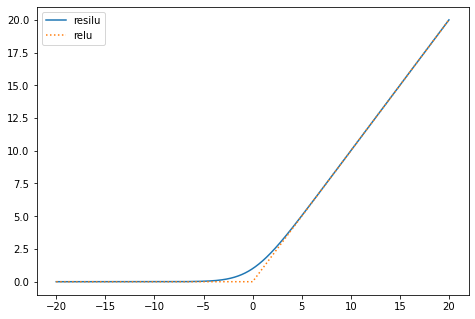

In [28]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(x,resilu(x),label='resilu')
ax.plot(x,relu(x),linestyle=':',label='relu')
ax.legend()

In [30]:
def resilu_nonlin(x):
    return x/(np.exp(x)-1.0)

def resilu_lin(x):
    return x

Resilu(x) can be split into a sum of two functions:

* linear part $f_1(x)=x$
* non-linear part $f_2(x)=\frac{x}{e^x-1}$, with exactly similar limit properties as the complete resilu function: $lim_{a\to\infty}\frac{x}{e^{x a}-1}=relu(-x)$

$$
resilu(x)=f_1(x)+f_2(x)=\frac{x}{e^x-1} + x = \frac{x}{1-e^{-x}}
$$

This should show that using resilu non-linearity should be äquivalent to using a 'standard' non-linearity and a skip connection that ommits the nonlinearity as additive residual connection. The only difference are arbitrary linear transformations which the net can easily cancel out.

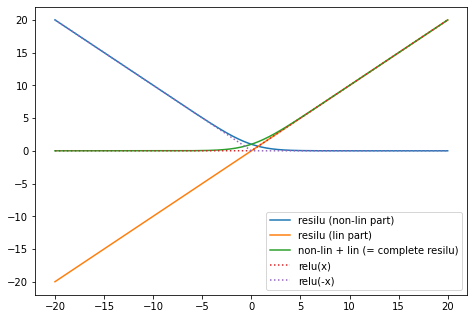

In [33]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(x,resilu_nonlin(x),label='resilu (non-lin part)')
ax.plot(x,resilu_lin(x),label='resilu (lin part)')
ax.plot(x,resilu_nonlin(x)+resilu_lin(x),label='non-lin + lin (= complete resilu)')
ax.plot(x,relu(x),linestyle=':',label='relu(x)')
ax.plot(x,relu(-x),linestyle=':',label='relu(-x)')
ax.legend()